In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal

1. Inserting the iris dataset


In [2]:
# including the iris dataset in the code
dataset = datasets.load_iris()
# dataset display
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# displaying dataset features
attributes=dataset.feature_names
attributes

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
#  value for attributes
A = (dataset.data)
A
B = (dataset.target)
B 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
# data selected for testing sets and training
A_train, A_test, B_train, B_test = train_test_split(A,B, random_state = 42, test_size=0.3)

2. Classification:

a. Linear Discriminant Analysis



In [66]:
class LinearDA:
    
    def fit(A, B):

            
        #  n number of records in total
        n = B.shape[0]

        #  The training set gets reshaped
        A = A.reshape(n, -1)
  
        
        #  Target val having different class val
        cls_val = len(np.unique(B.reshape(-1))) 

        #  No. of features in training set
        numbr_features = A.shape[1] 
        
        
        #  samples being inititialized as prior
        pr = np.zeros(cls_val)

        #  mean of samples being initialized
        mean = np.zeros((cls_val, numbr_features))

        #  cov_mat of samples being initialized
        cv_mt = np.zeros((cls_val, numbr_features, numbr_features))

        # for class values
        for val in range(cls_val):
            #  Generating index to separate the classes
            i = (B == val)
        
            #  updating cov_mat
            cv_mt[val] = np.cov(A[i, :], rowvar=0)

            #  prior being updated
            pr[val] = float(np.sum(i)) / n   

            #  updating the mean
            mean[val] = np.mean(A[i, :], axis=0)  

        return pr, mean, cv_mt

    def predict(A, pr, mean , cv_mt):  
        
        class_val = mean.shape[0] 
        
        # reshaping  data
        A = A.reshape(A.shape[0], -1)
        
        # Setting initially to zero
        weight = np.zeros((A.shape[0], class_val))

        for val in range(class_val): 
            # Calculating prob
            n_dist_prob = multivariate_normal(mean=mean[val], cov=cv_mt[val])
            # Calculating prob in X
            for i, x in enumerate(A):
                weight[i, val] = np.log(pr[val]) + n_dist_prob.logpdf(x)
        prd = np.argmax(weight, axis=1)
        return prd

b. Logistic Regression

In [83]:
class LogisticR():
    def  __init__(self, lr = 0.001, epochs = 100):
        self.bias = None
        
        self.epch = epochs

        self.lr = lr

        self.weight = None
    
    def fit(self, A, B_actual):
        
        # Features in training 
        n_featrs = A.shape[1]
        
        # bias and weight is initialized to zero
        self.weight = np.zeros(n_featrs)
        self.bias = 0
        
        # recording the loss in list
        mse_list = []
        stp_numbr_list = []

        # records in total
        n_recrds = A.shape[0]

        # Iterating
        for i in range(self.epch):
                    
            # using matrices weights and X Using dot products
            lr_pred = (A @ self.weight) + self.bias
            
            #Approximating B
            B_pred = self.sigmoid(lr_pred)
            
            # Calculating values for bias and weight by using derivation equations
            new_bias = (1/n_recrds) * np.sum(B_pred - B_actual)
            new_wt =  (1/n_recrds) * (A.T @ (B_pred - B_actual))

            # Updating  bias and weight with the values
            self.bias = self.bias - self.lr * new_bias
            self.weight = self.weight - self.lr * new_wt
            
            #Calculating  mse
            mse = np.mean((B_pred - B_actual)**2)
        
            # Saving step number and mse
            stp_numbr_list.append(i) 
            mse_list.append(mse)
                  
        
        return mse, mse_list, stp_numbr_list
    
    def predict(self, A):
        
        # using matrices weights and X Using dot products
        lr_pred = (A @ self.weight) + self.bias
        
        #Approximation B
        B_pred = self.sigmoid(lr_pred)
        
        predn = [1 if i > 0.5 else 0 for i in B_pred]
        
        return predn
    

    
    def plot_loss(self, mse_list, stp_numbr_list):
        plt.figure(figsize=(14,12))
        plt.plot(stp_numbr_list, mse_list)
        plt.scatter(stp_numbr_list, mse_list, marker=".", c= '#bcbd22', cmap='Red', edgecolors="Blue")
        plt.xlabel("Step number", fontsize = 12)
        plt.ylabel("Loss", fontsize = 12)
        plt.show()
        plt.show()
        
    def accuracy(self, prd, B):
        accuracy = np.sum(B == prd)/len(B)
        return accuracy
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))    


Training:

Linear Discriminant Analysis


In [84]:
# Creation of model
lda = LinearDA()
# training the model
pr, mean, cv_mt = LinearDA.fit(A_train, B_train)
# printing prior,mean,cov_mat
print(pr)
print(mean)
print(cv_mt)

[0.2952381  0.35238095 0.35238095]
[[4.96451613 3.37741935 1.46451613 0.2483871 ]
 [5.86216216 2.72432432 4.21081081 1.3027027 ]
 [6.55945946 2.98648649 5.54594595 2.00540541]]
[[[0.11569892 0.09817204 0.01669892 0.00677419]
  [0.09817204 0.14113978 0.01950538 0.00712903]
  [0.01669892 0.01950538 0.03436559 0.00877419]
  [0.00677419 0.00712903 0.00877419 0.01191398]]

 [[0.28297297 0.08816817 0.19847598 0.05760511]
  [0.08816817 0.08966967 0.09222973 0.04215465]
  [0.19847598 0.09222973 0.24599099 0.08385886]
  [0.05760511 0.04215465 0.08385886 0.04249249]]

 [[0.43414414 0.09777027 0.31913664 0.04939189]
  [0.09777027 0.09897898 0.08758258 0.06146396]
  [0.31913664 0.08758258 0.29644144 0.05224474]
  [0.04939189 0.06146396 0.05224474 0.0883033 ]]]


Logistic Regression

In [85]:
# model in Logistic Regression
B

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Model 1
Type A vs (Type B and Type C )

In [86]:
# Defining B for model-1

B_for_model1 = []

for i in range(len(B)):
    if(B[i] != 0):
        B_for_model1.append(1)
    else:
        B_for_model1.append(0)
B_for_model1 = np.array(B_for_model1)
print(B_for_model1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


Training for MSE will give =  0.17006726638557979


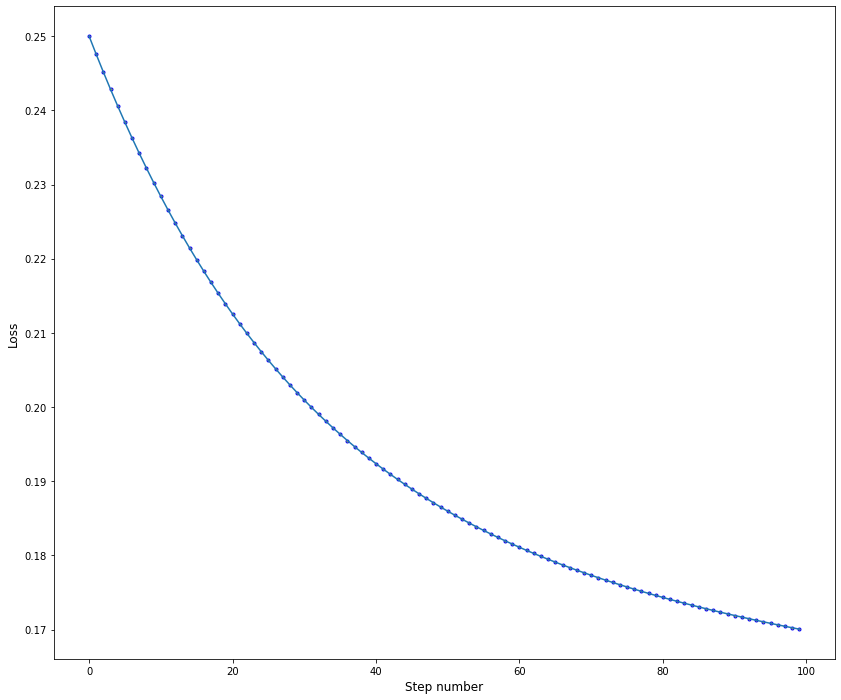

In [87]:
# splitting the selected data for testing sets and training
A_train_m1, A_test_m1, B_train_m1, B_test_m1 = train_test_split(A, B_for_model1, random_state = 42, test_size=0.3)

#  Creating Model-1
lr_m1 = LogisticR()

# Training Model-1
mse_m1, mse_list_m1, stp_numbr_list_m1 = lr_m1.fit(A_train_m1, B_train_m1)
print("Training for MSE will give = ", mse_m1)

# Plotting Model-1
lr_m1.plot_loss(mse_list_m1, stp_numbr_list_m1)

Model 2
Type B vs (Type A and Type C )

In [96]:
# Defining B for model-2

B_for_model2 = []

for i in range(len(B)):
    if(B[i] != 1):
        B_for_model2.append(1)
    else:
        B_for_model2.append(0)
B_for_model2 = np.array(B_for_model2)
print(B_for_model2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


Training for MSE will give =  0.22957518608104796


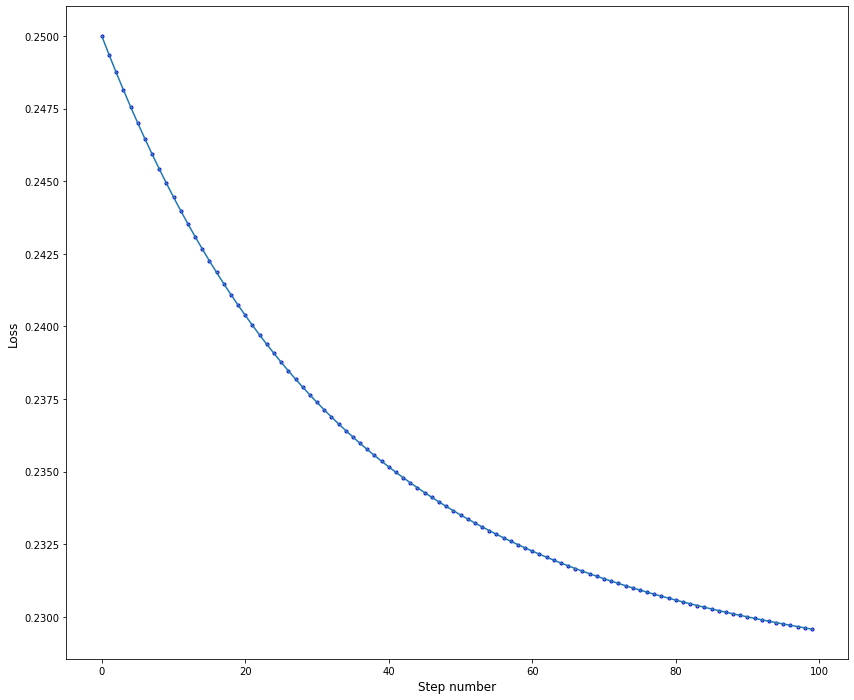

In [97]:
# splitting the selected data for testing sets and training
A_train_m2, A_test_m2, B_train_m2, B_test_m2 = train_test_split(A, B_for_model2, random_state = 42, test_size=0.3)

#  Creating Model-1
lr_m2 = LogisticR()

# Training Model-1
mse_m2, mse_list_m2, stp_numbr_list_m2 = lr_m2.fit(A_train_m2, B_train_m2)
print("Training for MSE will give = ", mse_m2)

# Plotting Model-1
lr_m2.plot_loss(mse_list_m2, stp_numbr_list_m2)

Model 3
Type C vs (Type A and Type B )

In [98]:
# Defining B for model-3

B_for_model3 = []

for i in range(len(B)):
    if(B[i] != 2):
        B_for_model3.append(1)
    else:
        B_for_model3.append(0)
B_for_model3 = np.array(B_for_model3)
print(B_for_model3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Training for MSE will give =  0.233490142346335


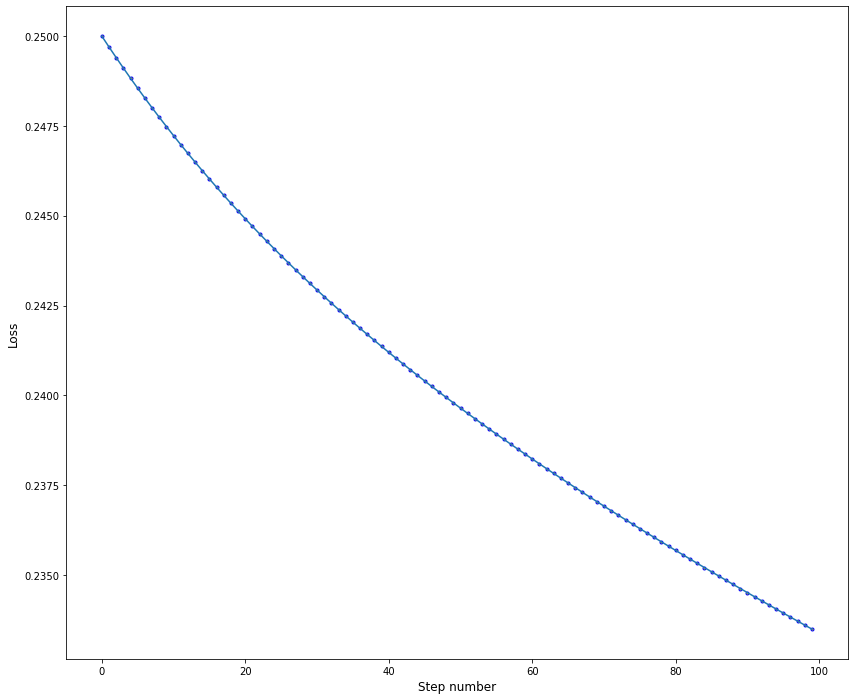

In [99]:
# splitting the selected data for testing sets and training
A_train_m3, A_test_m3, B_train_m3, B_test_m3 = train_test_split(A, B_for_model3, random_state = 42, test_size=0.3)

#  Creating Model-1
lr_m3 = LogisticR()

# Training Model-1
mse_m3, mse_list_m3, stp_numbr_list_m3 = lr_m3.fit(A_train_m3, B_train_m3)
print("Training for MSE will give = ", mse_m3)

# Plotting Model-1
lr_m3.plot_loss(mse_list_m3, stp_numbr_list_m3)

Testing:

Linear Discriminant Analysis:

In [100]:
# Using test dataset for predicting
pred = LinearDA.predict(A_test, pr, mean, cv_mt)
# Accuracy 
acc = np.sum(B_test == pred) / len(B_test)
print(" Linear Discriminant Accuracy = ",acc)

 Linear Discriminant Accuracy =  1.0


Logistic Regression:

Model-1

In [101]:
# Accuracy for model 1
#predicting
pred_m1 = lr_m1.predict(A_test_m1)
#generating accuracy
acc_m1 = lr_m1.accuracy(pred_m1, B_test_m1)
print("Accuracy For Model-1 = ",acc_m1)

Accuracy For Model-1 =  0.5777777777777777


Model-2

In [105]:
# Accuracy for model 2
#predicting
pred_m2 = lr_m2.predict(A_test_m2)
#generating accuracy
acc_m2 = lr_m2.accuracy(pred_m2,B_test_m2)
print("Accuracy For MODEL-2 = ",acc_m2)

Accuracy For MODEL-2 =  0.7111111111111111


Model-3

In [106]:
# Accuracy for model 3
#predicting
pred_m3 = lr_m3.predict(A_test_m3)
#generating accuracy
acc_m3 = lr_m3.accuracy(pred_m3, B_test_m3)
print("Accuracy For Model-3 = ",acc_m3)

Accuracy For Model-3 =  0.7111111111111111




From the test results we get that Linear Discriminant Analysis has a better prediction accuracy when compared to Logistic Regression which is of 100%